<center>Заметка 10. Численная теория вероятности.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.17</center>

<center>Аннотация</center>
<p>
Вводятся базовые элементы питона (Python версии 3.xx) на базе ключевых библиотек относящихся к анализу данных: построение графиков/гистограмм и численной статистике.
Последнее, в частности, используется для ввода ключевых понятий из анализа данных: выборка, плотность распределения и подгонка модели под данные.
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h1>Случайные величины и использование компьютера по назначению</h1>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

<h2>Генерация распределения</h2>

<h3>Непрерывные случайные величины</h3>

<b>Нормальное</b>

Существуют специальные (библиотечные) функции для создания случайных чисел.
Библиотека Numpy уже загружена и переименована как np. Поэтому возможен код:

In [2]:
# В данном случае формируем числа согласно нормальному распределению.
np.random.randn( 4 ) # В скобках указывается размер массива.

array([-0.36444611,  0.85788507, -1.39084404, -0.62661321])

In [3]:
a = np.random.randn( 4, 3) # Можно размеры и по другим осям. В данном случае, будет матрица 4x3.
a

array([[ 0.79334778, -0.86260596,  1.91965298],
       [ 0.13963103,  2.55403883,  1.16350701],
       [ 0.44533086,  1.15812127, -0.96379915],
       [ 1.76622369,  0.56193136, -0.3312121 ]])

In [4]:
a.shape

(4, 3)

np.random является модулем, т.е. он содержит набор функций со схожим смыслом.
Равномерное распределение задается просто функцией rand из модуля np.random

<b>Равномерное</b>

In [5]:
np.random.rand(4) # Равномерное распределение на интервале [0, 1)

array([0.9701337 , 0.83863067, 0.83016209, 0.71468217])

<h3>Дискретные случайные величины</h3>

Известно что по равномерной случайной величине можно сгенерировать произвольную слуайную величину использую обратную функцию.

In [6]:
bern = (np.random.rand(1000) < 0.7) + 0 # Распределение буернули с парметром 0.7. Зачем добавлен 0?)
bern[10:30]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [7]:
np.sum(bern == 0)/len(bern), np.sum(bern == 1)/len(bern) # Численно получили почти то что требуется.

(0.294, 0.706)

In [8]:
np.mean(bern == 0), np.mean(bern == 1) # Можно сразу посчитать среднее.

(0.294, 0.706)

In [9]:
data = np.random.randint(-10, 10, 10) # Равномерное целочисленное распределение между -10 и 10 невключительно.
data

array([  8,  -5,   7, -10,   0,  -6,  -9,  -3,  -8,   3])

<h2>Гистограмма дискретной случайной величины</h2>

Давай посчитаем количество раз которое то или иной число встречается.
Это можно сделать по разному.

<h3>Подсчет элементов</h3>

In [10]:
equal = data == data[2] # Да, да, помимо стандартных арифметических операций над массивами
equal #  можно и логические операции делать.

array([False, False,  True, False, False, False, False, False, False,
       False])

In [11]:
# А потом посчитать поличество "истин".
cnt = np.sum( equal ) # Напомню, при преобразовании в целое истина превращается в 1, а ложь в 0.
cnt

1

In [12]:
cnt/len( equal ) # Долю можно найти поделив на общее количество чисел.

0.1

Можно конечно посчитать и более сложные условия (диапазоны значений).

In [13]:
cnt_n = np.sum( data < 0 ) # Количество отрицательных
cnt_p = np.sum( data > 0 ) # Количество положительных
cnt_e = np.sum( data == 0 ) # Количество равных нулю
f'Количество положительных, отрицательных и равных нулю элементов соответственно равно {cnt_p}, {cnt_n} и {cnt_e}'

'Количество положительных, отрицательных и равных нулю элементов соответственно равно 3, 6 и 1'

Для большей статестической правдоподобности.

In [14]:
data = np.random.randint(-10, 10, 100)

cnt_n = np.sum( data < 0 ) # Количество отрицательных
cnt_p = np.sum( data > 0 ) # Количество положительных
cnt_e = np.sum( data == 0 ) # Количество равных нулю

print( ">0 : ", cnt_p, "   <0 : ", cnt_n, " ==0 : ", cnt_e)

>0 :  34    <0 :  57  ==0 :  9


In [15]:
100/20 # Приблизительно равно количеству равных 0.

5.0

In [16]:
np.max(data) - np.min(data)+1

20

<h3>Вычисление гистограммы</h3>

Давай посчитаем количество раз которое кстречается каждое из чисел. По научному это называется гистограммой.

In [17]:
# Ламбда функция для подсчета частоту встречаемости элемента в массиве.
cnt = lambda data, e : np.mean( data == e ) # Выборочная функция.

In [18]:
cnt( data, 0), cnt_e/len(data) # Вроде работает как надо.

(0.09, 0.09)

In [19]:
cnt(data,5)

0.05

Теперь нужно прогнать все возможные числа.

In [20]:
# все возможные исходы для равномерного распределения
elems = range(-10, 10, 1) #  на рассматриваемом интервале.
list( elems ) # Выведем их для полноты понимания.

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
hist = map( lambda e: cnt( data, e), elems )
hist = list( hist ) # Получили искомый список частот встречаемости.

In [22]:
n = 4 # Число для которого выводится частота встречаемости.
f'Число {n} встречается в выборке {hist[10+n]*100}%.'

'Число 4 встречается в выборке 4.0%.'

Его можно по разному выводить. Можно просто списком. Но это не наглядно.

Можно графиком.

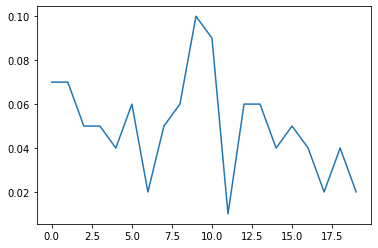

In [23]:
plt.plot( hist )

Но обычно все-таки использую спецаильный вид графиков -- гистограммы (прямоугольники).

<BarContainer object of 20 artists>

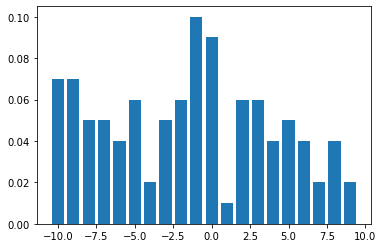

In [24]:
plt.bar( elems, hist )

In [25]:
z=np.linspace(-5,5, 20)

<BarContainer object of 20 artists>

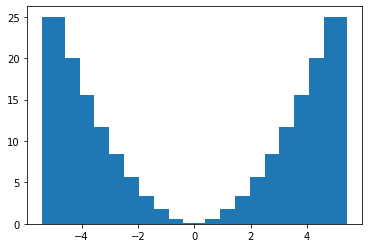

In [26]:
plt.bar(z, z*z)

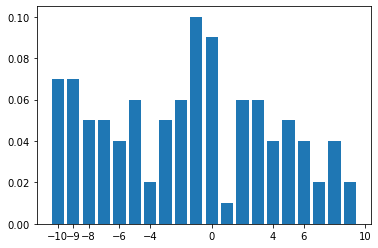

In [27]:
plt.bar( elems, hist )
plt.xticks( [-10, -9, -8, -6, -4, 0, 4, 6, 10] ); # Укажем системе где пометить колонки.

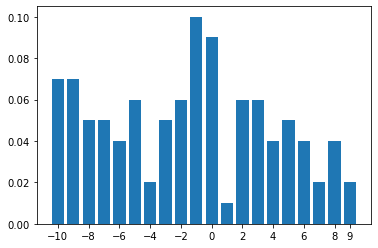

In [28]:
plt.bar( elems, hist )
plt.xticks( [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 9] ); # ; Дабы не было печати.

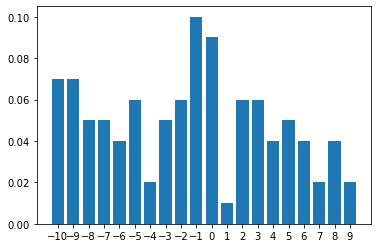

In [29]:
plt.bar( elems, hist )
plt.xticks( elems ); # Укажем системе где пометить колонки.

<h3>Библиотечная</h3>

In [30]:
# В питоне, а точнее в модуле numpy, есть готовая функция для этих целей: histogram.
hh = np.histogram( data ) # В аргументе подается сам массив данных.
hh

(array([14, 10, 10,  7, 16, 10, 12,  9,  6,  6]),
 array([-10. ,  -8.1,  -6.2,  -4.3,  -2.4,  -0.5,   1.4,   3.3,   5.2,
          7.1,   9. ]))

In [31]:
np.unique( data )#.shape

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [32]:
# Изучим переменую hh, которая соответствует гистограмме.
type( hh ), len( hh )
# Она является парой (tuple)...содержит два элемента.

(tuple, 2)

In [33]:
type( hh[0] ), type( hh[1] )
# состоящей из двух массивов (numpy.ndarray).

(numpy.ndarray, numpy.ndarray)

In [34]:
hh[0].shape, hh[1].shape

((10,), (11,))

In [35]:
hh[0].dtype, hh[1].dtype

(dtype('int64'), dtype('float64'))

In [36]:
hh # Смотрим содержимое переменной hist.

(array([14, 10, 10,  7, 16, 10, 12,  9,  6,  6]),
 array([-10. ,  -8.1,  -6.2,  -4.3,  -2.4,  -0.5,   1.4,   3.3,   5.2,
          7.1,   9. ]))

In [37]:
hh[0] # Содержит встречаемость чисел в наборе данных .

array([14, 10, 10,  7, 16, 10, 12,  9,  6,  6])

In [38]:
# Содержит границы ячеек для которых посчитано количество.
hh[1]

array([-10. ,  -8.1,  -6.2,  -4.3,  -2.4,  -0.5,   1.4,   3.3,   5.2,
         7.1,   9. ])

In [39]:
hh[0].shape, hh[1].shape # По умолчанию будет сделано 10 якеек. В данном случае это нам не годится.

((10,), (11,))

Сформируем свои границы ячеек.

In [40]:
edges = list( elems )
edges + [10] # Дабы добавить правую границу (невключительно) последнего элемента.

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [41]:
# Заново вызовем функцию передва границы ячеек во втором аргументе. Правая граница не включена в дапазон.
hh = np.histogram( data, edges + [10] ) # Поэтому нужно добавить 10 как самую праую границу.
hh # В случае целочисленных данных факически при подсчете используется только левая граница.

(array([ 7,  7,  5,  5,  4,  6,  2,  5,  6, 10,  9,  1,  6,  6,  4,  5,  4,
         2,  4,  2]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]))

In [42]:
n = 4 # По аналогии.
f'Число {n} встречается в выборке {hh[0][10+n]} раз.' # При выводе вывелась дробная часть.

'Число 4 встречается в выборке 4 раз.'

<b>Построение гистограммы</b>

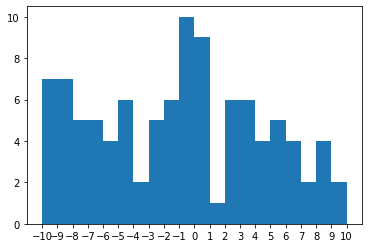

In [43]:
# Можно минуя функцию histogram сразу нарисовать график.
hhh = plt.hist( data, edges + [10] ) # При этом параметры отрисовки будут коректными автоматически.
plt.xticks( edges + [10] );

In [44]:
# Вызовем функцию, которая вычисляет только гистограммы, она её не рисует.
hhh

(array([ 7.,  7.,  5.,  5.,  4.,  6.,  2.,  5.,  6., 10.,  9.,  1.,  6.,
         6.,  4.,  5.,  4.,  2.,  4.,  2.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 <BarContainer object of 20 artists>)

Видим, что результат совпадает. Скоре всего код функции plt.hist вызывает функцию np.histogram.

Упр. Вычислить гистограмму совсем вручную: использую цикл и список...

<h3>Сравнение гистограмм</h3>

Возникает вопрос о том как убедится, что у нас результат совпадает.

In [45]:
hist = np.array( hist ) # Для удобства превратим список в массив.

In [46]:
hh[0].shape, hist.shape # Сначала убедимся, что совпадают размеры.

((20,), (20,))

In [47]:
hh[0] # При малом объеме данных можно сравнить выведевв массивы.

array([ 7,  7,  5,  5,  4,  6,  2,  5,  6, 10,  9,  1,  6,  6,  4,  5,  4,
        2,  4,  2])

In [48]:
hist * len(data) # Умножаем на количество чисел ввиду того, что мы подсчитывали долю, а не количество.

array([ 7.,  7.,  5.,  5.,  4.,  6.,  2.,  5.,  6., 10.,  9.,  1.,  6.,
        6.,  4.,  5.,  4.,  2.,  4.,  2.])

<b>Визуальное сравнение</b>

Можно сравнить визуально выведя обе гистограммы как график.

<BarContainer object of 20 artists>

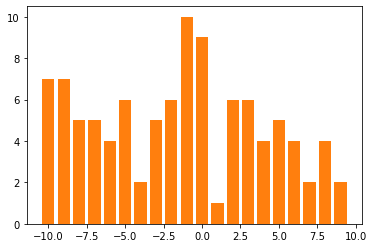

In [49]:
# Наивный способ отрисовки двух графиков столбцов.
plt.bar( elems, hist * len(data) ) # !len(data)
plt.bar( elems, hh[0] ) # Первый график был закрашен вторым.

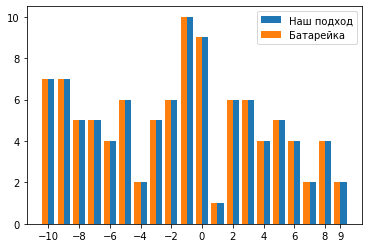

In [50]:
# Чтобы нарисовать два графика с колонками нужно изменить параметры отрисовки.
# Стандартно колонки имеют ширину 0.8. Аргумент width изменяет ширину колонки. Выставим её в половину.
plt.bar( elems, hist * len(data), width = 0.4, align = 'edge' ) # align задает способ выравнивания.
plt.bar( elems, hh[0], width = -0.4, align = 'edge' ) # Положительный по левую сторону
plt.xticks( [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 9] ) # Отрицательный по правую сторону от метки.
plt.legend(["Наш подход", "Батарейка"])

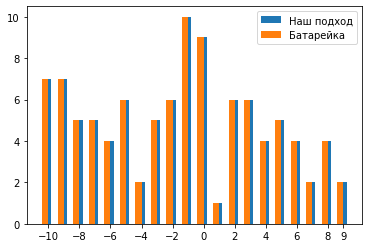

In [51]:
plt.bar( elems, hist * len(data), width = 0.4, align = 'center' )
plt.bar( elems, hh[0], width = -0.4, align = 'edge' )
plt.xticks( [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 9] )
plt.legend(["Наш подход", "Батарейка"])

Визаульно конечно можно получить некое общее представление, что все вопрядке, но хотелось бы более нажедного способа.

Можно по-элементно сравнить массивы на совпадение.

<b>Численное сравнение</b>

In [52]:
hh[0]

array([ 7,  7,  5,  5,  4,  6,  2,  5,  6, 10,  9,  1,  6,  6,  4,  5,  4,
        2,  4,  2])

In [53]:
hist

array([0.07, 0.07, 0.05, 0.05, 0.04, 0.06, 0.02, 0.05, 0.06, 0.1 , 0.09,
       0.01, 0.06, 0.06, 0.04, 0.05, 0.04, 0.02, 0.04, 0.02])

In [54]:
len(hist)

20

In [55]:
eq = hh[0] == hist*len(data)
eq # Опять же визуально видно, что все вроде истинно...

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [56]:
np.array([True, True, True]).all(), np.array([True, False, True]).all()

(True, False)

In [57]:
np.array([False, False, False]).all()

False

In [58]:
eq.all( ) # Проверяет истинные ли все элементы вместе взятые.

False

In [59]:
eq == False

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [60]:
# Строим массив мест для которых ложь.
w = np.where( eq == False )
w

(array([0, 1]),)

In [61]:
hh[0][w], (hist*100)[w]

(array([7, 7]), array([7., 7.]))

In [62]:
(hist*100)[w]-hh[0][w]

array([8.8817842e-16, 8.8817842e-16])

In [63]:
np.allclose(hh[0], hist*len(data))

True

In [64]:
# Округляем числа до целого числа.
myhist = (hist*len(data)).round(decimals=14)

In [65]:
eq = hh[0] == myhist
eq

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
eq.all() # Теперь должна дать истину.

True

In [67]:
?np.round

Signature: np.round(a, decimals=0, out=None)
Docstring:
Round an array to the given number of decimals.

See Also
--------
around : equivalent function; see for details.
File:      /data/conda/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py
Type:      function


In [68]:
(hh[0] - hist*len(data)).std() # Но можно и так, вычислив среднекадратичное отклонение разности.

2.664535259100376e-16

Упр. Как циклом за один найти наиболее часто встречаемый элемент?

<h2>Гистограмма непрерывной случайной величины</h2>

Рассмотрим непрерывную случайную величину.

<h3>Подсчет количеств</h3>

In [69]:
data = np.random.rand( 100 ) # Массив из 100 чисел равномерно распределеных на интервале [0 1).

In [70]:
np.min( data ), np.max( data ) # Убедимся в этом.

(0.029457044383584097, 0.9794707754246657)

В данном случае мы не сможем посчитать количества раз которое та или иная величина встречается. Для адекватного подсчета нужно разбить интервал на равные подинтервалы.

In [71]:
# Допустим мы хотим разбить интервал [0, 1) на десять равных подинтервалов.
d = np.linspace(0, 1, 11) # Тогда нам нужно на этом интервале расположить 11 точек.
d

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [72]:
d[2], d[3] # Пример интервала.

(0.2, 0.30000000000000004)

In [73]:
get = d[2] <= data # Это даст те числа которые больше равны d[2], т.е. 0.2. gt -- greater or equal than.

In [74]:
lt = data < d[3] # А это те которые строго меньше 0.3. l -- less than.

In [75]:
get & lt # Объеденить их можно так.

array([False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [76]:
# Напишем функцию аналогичную дискретному случаю.
cnt = lambda data, e : np.mean( (e[0]<= data) & (data < e[1]) ) # Выборочная функция.

In [77]:
cnt( data, (d[2], d[3]) ), cnt( data, (d[5], d[6]) ) # Проведем подсчет для пары итервалов.

(0.1, 0.08)

<h3>Вычисление гистограммы</h3>

In [78]:
interval = list(map( lambda i: (d[i], d[i+1]), range(10) ) ) # Создаем список кортежей границ интервалов.
interval # Содержит кортежи интервалов.

[(0.0, 0.1),
 (0.1, 0.2),
 (0.2, 0.30000000000000004),
 (0.30000000000000004, 0.4),
 (0.4, 0.5),
 (0.5, 0.6000000000000001),
 (0.6000000000000001, 0.7000000000000001),
 (0.7000000000000001, 0.8),
 (0.8, 0.9),
 (0.9, 1.0)]

In [79]:
hist2 = map( lambda e: cnt( data, e), interval)
hist2 = list(hist2)
hist2

[0.05, 0.1, 0.1, 0.14, 0.05, 0.08, 0.14, 0.09, 0.13, 0.12]

<BarContainer object of 10 artists>

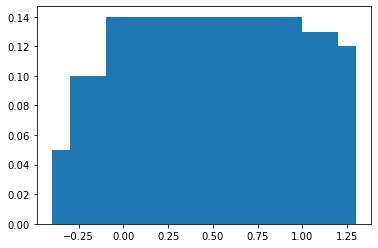

In [80]:
plt.bar( d[:-1], hist2 ) # Какой то странный вид гистограммы для равномерного распределения....

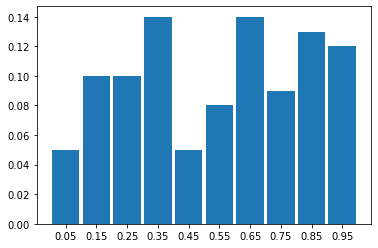

In [81]:
plt.bar( d[:-1]+0.05, hist2, width=0.09 ) # Изменена ширена колонки дабы они не накладывались друг на друга.
plt.xticks( d[:-1]+0.05 ); # 0.05 Дабы центр колонки был там где надо.

(array([ 8.,  8., 10., 13.,  6.,  7., 12., 11., 10., 15.]),
 array([0.02945704, 0.12445842, 0.21945979, 0.31446116, 0.40946254,
        0.50446391, 0.59946528, 0.69446666, 0.78946803, 0.8844694 ,
        0.97947078]),
 <BarContainer object of 10 artists>)

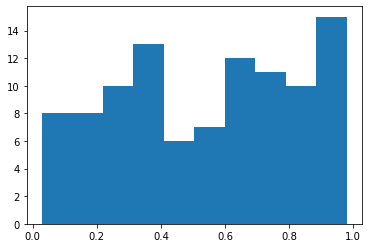

In [82]:
plt.hist( data ) # Опять же можно воспользоватся готовой функцией.

<b>Поиск объекта на изображении</b>

In [83]:
img = plt.imread('7.1.02.tiff')
img.shape

(512, 512)

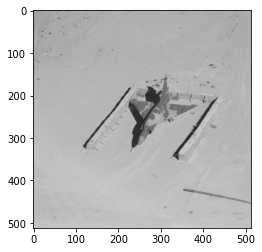

In [84]:
plt.imshow(img, cmap='gray')

In [85]:
sum0 = np.mean( img, axis = 0 )
sum1 = np.mean( img, axis = 1 )
sum0.shape, sum1.shape

((512,), (512,))

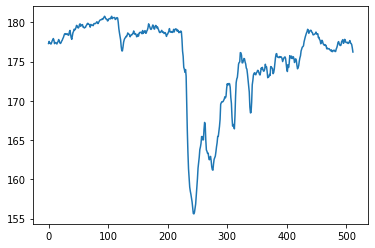

In [86]:
plt.plot( sum0 )

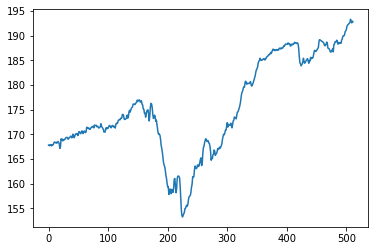

In [87]:
plt.plot( sum1 )

In [88]:
p = np.polyfit( np.arange(0, 512, 1), sum1, 1 )
p # p(x) = p[0] * x**deg + ... + p[deg]

array([4.66239766e-02, 1.63422512e+02])

In [89]:
xx = np.arange(0, 512, 1)

In [90]:
n = np.sum((xx - np.mean(xx))*(sum1 - np.mean( sum1 )))
d = np.sum((xx - np.mean(xx))**2)
n, d

(521478.361328125, 11184768.0)

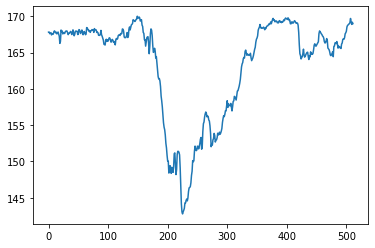

In [91]:
plt.plot( sum1 - p[0]*xx)

In [92]:
np.min( sum0 )

155.58984375

In [93]:
xcrd = np.where( sum0 == np.min( sum0 ) )
xcrd

(array([244]),)

In [94]:
ycrd = np.where( sum1 == np.min( sum1 ) )
ycrd

(array([225]),)

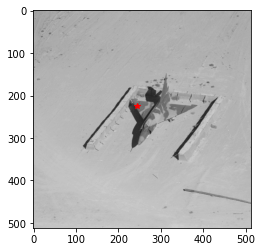

In [95]:
plt.imshow(img, cmap='gray')
plt.plot( xcrd, ycrd, 'r*')

<h3>Плотность распределения</h3>

Возвращаемся к вопросу о формировании произвольного распределения по равномерному.

In [96]:
import scipy.stats as models # Загружаем модуль знающий о сложных распределениях.
import scipy.special as sp

In [97]:
x = np.random.rand(1000)
nn = sp.erfinv( 2*x - 1  ) * np.sqrt(2)

In [98]:
nn[20:40]

array([ 0.45951959,  0.15588191, -1.03389108,  0.91643848, -0.06141641,
       -0.46014208, -0.38725496,  0.05105583, -0.38119611,  0.7527464 ,
        1.11606978, -0.33193665,  0.67245078,  0.03220227, -0.50581301,
        1.10607636, -1.76735953,  0.5705234 ,  0.44561383,  0.34329685])

(array([  1.,   9.,  42., 111., 226., 299., 207.,  74.,  23.,   8.]),
 array([-3.91441368, -3.18315763, -2.45190158, -1.72064553, -0.98938948,
        -0.25813343,  0.47312262,  1.20437868,  1.93563473,  2.66689078,
         3.39814683]),
 <BarContainer object of 10 artists>)

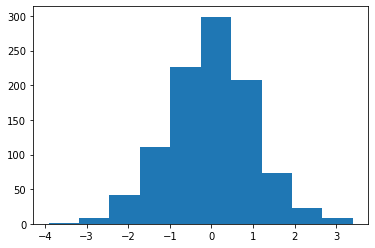

In [99]:
plt.hist( nn )

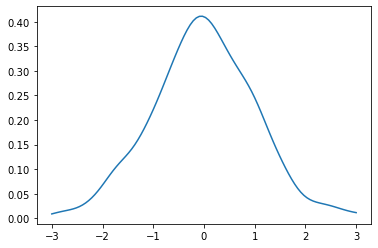

In [100]:
# Можно приблизить плотность распределения за счет ядерного подхода.
gg = models.gaussian_kde( nn )
x = np.linspace(-3, 3, 100)
plt.plot( x, gg(x) )

In [101]:
1/np.sqrt(2*np.pi) # Максимальное значение плотности.

0.3989422804014327

In [102]:
np.max( gg(x) )

0.411074097771644

In [103]:
np.argmax( gg(x) )

49

In [104]:
gg(x[49])

array([0.4110741])

In [105]:
imax = np.argmax( gg(x) )
f'индекс {imax} в массиве x. В точке {x[imax]:.2} достигается максимальное значение {gg( x[imax] )[0]:2}'

'индекс 49 в массиве x. В точке -0.03 достигается максимальное значение 0.411074097771644'

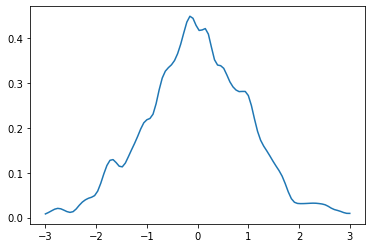

In [106]:
gg = models.gaussian_kde( nn, 0.1 ) # Можно задать параметр
x = np.linspace(-3, 3, 100)
plt.plot( x, gg(x) )

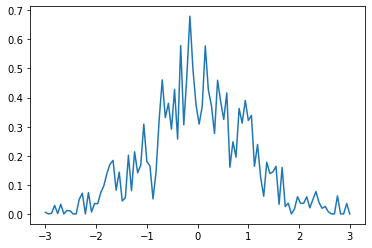

In [107]:
gg = models.gaussian_kde( nn, 0.01 )
x = np.linspace(-3, 3, 100)
plt.plot( x, gg(x) )

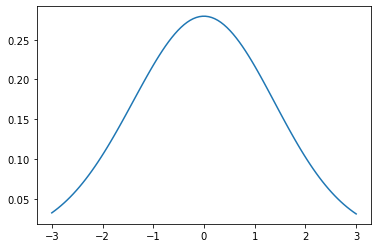

In [108]:
gg = models.gaussian_kde( nn, 1 )
x = np.linspace(-3, 3, 100)
plt.plot( x, gg(x) )

<b>Выделение объекта определенного цвета</b>

In [109]:
beans = plt.imread('4.1.08.tiff')
beans.shape

(256, 256, 3)

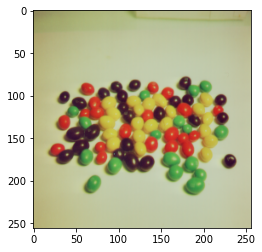

In [110]:
plt.imshow( beans );

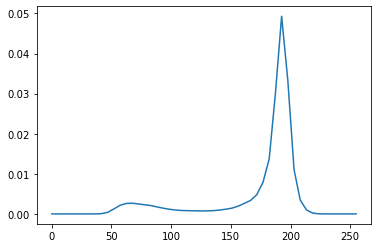

In [111]:
gg = models.gaussian_kde( beans[:,:,0].flatten(), 0.1 )
x = np.linspace(0, 255, 50)
plt.plot( x, gg(x) )

In [112]:
tmp = beans.copy()

In [113]:
tmp[ beans[:,:,0] < 160] = [0,0,0]

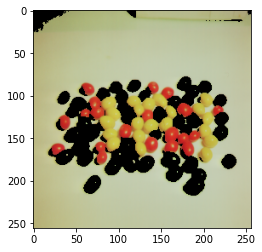

In [114]:
plt.imshow( tmp )

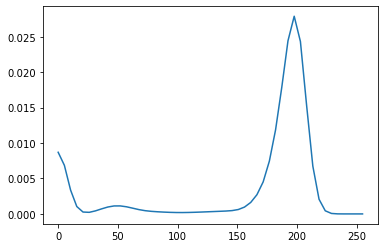

In [115]:
gg = models.gaussian_kde( tmp[:,:,1].flatten(), 0.1 ) # Можно приблизить плотность распределения за счет ядерного подхода.
x = np.linspace(0, 255, 50)
plt.plot( x, gg(x) )

In [116]:
tmp[ beans[:,:,1] > 100] = [0,0,0]

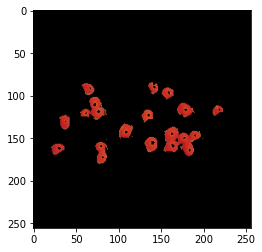

In [117]:
plt.imshow( tmp )

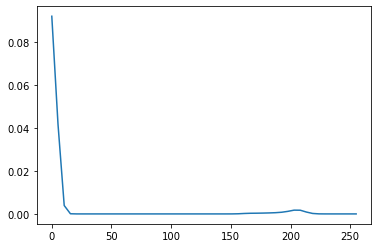

In [118]:
gg = models.gaussian_kde( tmp[:,:,0].flatten(), 0.1 ) # Можно приблизить плотность распределения за счет ядерного подхода.
x = np.linspace(0, 255, 50)
plt.plot( x, gg(x) )

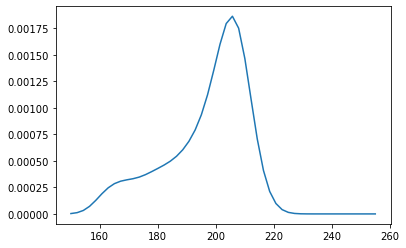

In [119]:
gg = models.gaussian_kde( tmp[:,:,0].flatten(), 0.1 ) # Можно приблизить плотность распределения за счет ядерного подхода.
x = np.linspace(150, 255, 50)
plt.plot( x, gg(x) )

In [120]:
bb = 160 < tmp[:,:,0]
bb.shape

(256, 256)

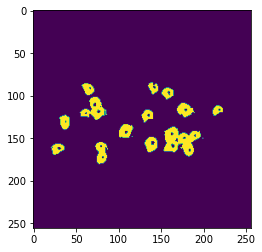

In [121]:
plt.imshow( bb )

Для того чтоб выяснить как завершить подсчет приходите как мой курс по OpenCV (Введение в цифровую обработку изображений)

Упр. По аналогии выделите бобовые зерна зеленого цвета.

<h2>Численная статистика</h2>

<h3>Нормальное распределение</h3>

<b>Формирование случайной величины</b>

In [122]:
gen_data = np.random.randn( 10000 ) * 3.3 + 0.5 # Вывода нет потому что мы присвоили результат переменой.
gen_data.shape

(10000,)

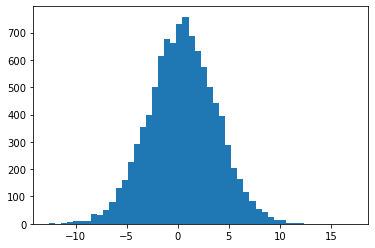

In [123]:
# Строим гистограмму по заданному массиву чисел.
hist = plt.hist( gen_data, 50); # В переменную hist сохраняются сами значения гистограммы.

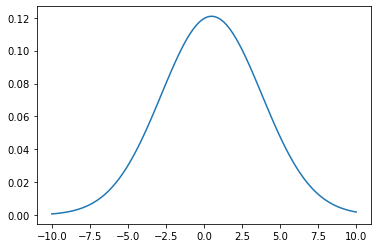

In [124]:
x = np.linspace(-10,10, 100)
p = models.norm.pdf( x, scale=3.3, loc=0.5 )
plt.plot(x, p)

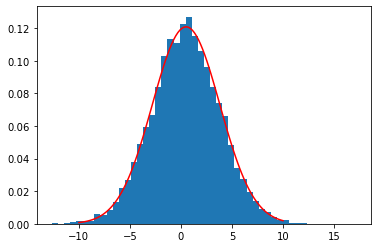

In [125]:
plt.hist( gen_data, 50, density=True)
plt.plot( x, p, 'r')

<b>Восстановление/оценка параметров случайной величины по выборке</b>

In [126]:
mm, ss = models.norm.fit( gen_data ) # Вычислим параметры распределения по выборке.
mm, ss # Корректно когда искомое распределение известно.

(0.46500332187073934, 3.3305522039257234)

In [127]:
np.mean( gen_data ), np.std( gen_data )

(0.46500332187073934, 3.3305522039257234)

In [128]:
# Зная параметры распределения можно вычислить всякие вещи.
models.norm.cdf( -0.3, scale=ss, loc=mm ) # Например, можно вычислить вероятность события: < -0.3.

0.40916530798230527

<b>Мат ожидание от произвольной функции</b>

In [129]:
def moment(x, n): # Вычислим моменты вручную.
    return x**n

In [130]:
#models.norm.m

In [131]:
models.norm.expect( lambda xx:moment(xx,1), scale=3.3, loc=0.5) # Через нашу функцию.

0.49999999999999994

In [132]:
models.norm.expect( lambda xx:moment(xx,2), scale=3.3, loc=0.5) # Через нашу функцию.

11.14

In [133]:
np.sqrt(11.14-0.5**2)

3.3000000000000003

In [134]:
models.norm.moment( 1, scale=3.3, loc=0.5), models.norm.mean( scale=3.3, loc=0.5) # Аналитически.

(0.5, 0.5)

In [135]:
models.norm.moment( 2, scale=3.3, loc=0.5), models.norm.std( scale=3.3, loc=0.5) # Аналитически.

(11.139999999999999, 3.3)

In [136]:
models.norm.expect( lambda x:moment(x,2), scale=3.3, loc=0.5) # Через явную функцию.

11.14

In [137]:
models.norm.moment( 2, scale=3.3, loc=0.5) # Аналитически, т.е. по формуле.

11.139999999999999

<b>Хм.. Какие же точки используются для интегрирования...</b>

In [138]:
l = []
def dd(x):
    l.append(x)
    return x

In [139]:
models.norm.expect( dd, scale=3.3, loc=0.5)

0.49999999999999994

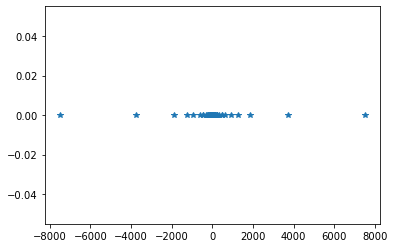

In [140]:
plt.plot(l, np.zeros_like(l), '*')

In [141]:
models.norm.stats( scale=3.3, loc=0.5 ) # По формуле.

(array(0.5), array(10.89))

In [142]:
l = []
def dd(x, n):
    l.append(x)
    return x**n

In [143]:
dd(6.6, 2)

43.559999999999995

In [144]:
l

[6.6]

In [145]:
models.norm.expect( lambda xx:dd(xx,2), scale=3.3, loc=0.5)

11.14

In [146]:
l[:10]

[6.6,
 1.0,
 -1.0,
 233.0651686899483,
 0.0042906454260024365,
 -233.0651686899483,
 -0.0042906454260024365,
 38.29883980138545,
 0.026110451522446055,
 -38.29883980138545]

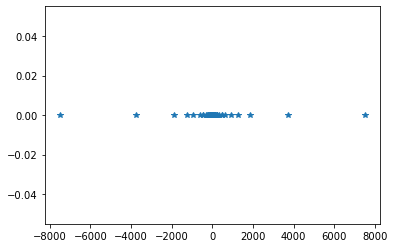

In [147]:
plt.plot(l, np.zeros_like(l), '*')

<b>Сравнение с численным</b>

In [148]:
# Если же нам неизвестно распределедние, то можно по данным.
np.mean( gen_data < -0.3 ) # F(-0.3)=P(x<-0.3|x в R)

0.406

In [149]:
models.norm.cdf( -0.3, scale=3.3, loc=0.5 ) # Если мы знаем случайную величину

0.4042257258869503

In [150]:
gen_data = np.random.randn( 10000 ) * 3.3 + 0.5 # Вывода нет потому что мы присвоили результат переменой.
gen_data.shape

(10000,)

<h3>Хи квадрат -- Выражение из случайных величин</h3>

In [151]:
# Изучим Хи-квадрат численно.
gen_data = np.random.randn( 1000, 5) # 1000 раз по 5 нормальных распределений.
gen_data[0] # Так выглядит строчка матрицы.

array([ 0.86663876,  0.55613306, -0.41962498, -0.56762524, -0.47737807])

In [152]:
# Убедимся в правильности размера массива (матрицы).
gen_data.shape # В скобках перечислены размер массива вдоль каждого из измерений.

(1000, 5)

In [153]:
gen_data[0].shape, gen_data[999].shape

((5,), (5,))

In [154]:
sq_data = gen_data * gen_data # Массив состоящий их квадратов нормального распределения.
sq_data.shape

(1000, 5)

In [155]:
gen_data2 = np.sum( sq_data, axis = 1 ) # сумируем вдоль оси с индекосм 1 (нумирация начинается с 0).
gen_data2.shape # получаем массив состоящий из суммы 5 квадратов номального распределения
# т.е. выборка из Хи-квадрат с параметром 5.

(1000,)

Теперь забывае как мы его создали. Считаем, что данные откуда-то взялись.

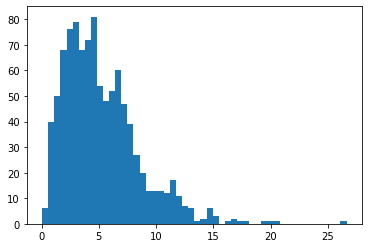

In [156]:
hist = plt.hist( gen_data2, 50); # Сторим гистограмму. Она должна напоминать гистограмму Хи-квадрат.

In [157]:
cnt = np.mean( gen_data2 < 7  ) # Данная строчка посчитает сколько числе в выборке меньше 7.
cnt

0.758

In [158]:
# Можно воспользоватся явной функцией (chi2), которая использует формулу.
models.chi2.cdf( 7, 5 ) # Первое число указывает точку (7), воторое значение параметра (5) распределения.
# Замечаем, что значение близко к рассчетному.

0.7793596920632894

In [159]:
models.chi2.mean( 5 )

5.0

In [160]:
it = models.chi2.interval( 0.95, 5 ) # Строим доверительный интервал.
it

(0.831211613486663, 12.832501994030027)

In [161]:
models.chi2.cdf( it[0], 5 ), 1.0 - models.chi2.cdf( it[1], 5 ) # Проверяем доверительный интервал.

(0.02500000000000003, 0.025000000000000022)

In [162]:
models.chi2.cdf( it[1], 5 ) - models.chi2.cdf( it[0], 5 ) # Проверяем его иначе.

0.95

In [163]:
np.mean( (it[0] <= gen_data2) & (gen_data2 <= it[1]) ) # Проверяем численно.

0.954

Упр. Посчитайте гистограмму красных бобовых зерен. Указание: используйте найденную маску.